In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.__version__

'1.15.0-rc3'

In [0]:
is_correct_tf_version = '1.15.' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version {} installed".format(tf.__version__)

is_eager_enabled = tf.executing_eagerly()
assert is_eager_enabled,      "Tensorflow eager mode is not enabled"

In [0]:

# Create the nodes in the graph, and initialize values
a = tf.constant(15, name="a")
b = tf.constant(61, name="b")

# Add them!
c = tf.add(a,b, name="c")
print(c)

tf.Tensor(76, shape=(), dtype=int32)


In [0]:
# Construct a simple computation graph
def graph(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a, b)
  d = tf.subtract(b, 1)
  e = tf.multiply(c, d)
  return e

In [0]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = graph(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [0]:

# n_in: number of inputs
# n_out: number of outputs
def our_dense_layer(x, n_in, n_out):
  # Define and initialize parameters, a weight matrix W and biases b
  W = tf.Variable(tf.ones((n_in, n_out)))
  b = tf.Variable(tf.zeros((1, n_out)))
  
  '''TODO: define the operation for z (hint: use tf.matmul)'''
  z = tf.matmul(x,W) + b
  
  '''TODO: define the operation for out (hint: use tf.sigmoid)'''
  out = tf.sigmoid(z)
  return out

In [0]:
'''TODO: define an example input x_input'''
x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: call `our_dense_layer` to get the output of the network!'''
print (our_dense_layer(x_input, n_in=2, n_out=3))

tf.Tensor([[0.95257413 0.95257413 0.95257413]], shape=(1, 3), dtype=float32)


In [0]:

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# First define the model 
model = Sequential()


'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
dense_layer = Dense(n_output_nodes, input_shape=(n_input_nodes,),activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [0]:

# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
print(model(x_input))

tf.Tensor([[0.38325924 0.64187145 0.7643948 ]], shape=(1, 3), dtype=float32)


Initializing x=[[-0.31946355]]


Text(0, 0.5, 'x value')

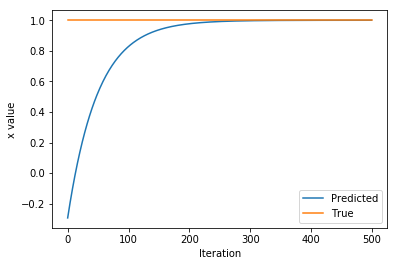

In [0]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))
learning_rate = 1e-2
history = []

for i in range(500):
  with tf.GradientTape() as tape:
    y = (x - 1)**2 # record the forward pass on the tape

  grad = tape.gradient(y, x) # compute the gradient of y with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0, 500],[1,1])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')